In [1]:
#This uses an open source python library to collect Historical Cryptocurrency Data
#This library interacts with the CoinBase Pro API to return historical data of bitcoins from the API in a Pandas DataFrame.

!pip install Historic-crypto

In [2]:
import warnings
warnings.filterwarnings("ignore")

from Historic_Crypto import HistoricalData

In [3]:
# Extracting the data from 2018-01-01 to 2023-11-30.
btc_data=HistoricalData('BTC-USD', 21600, '2018-01-01-00-00', '2023-11-30-00-00').retrieve_data()

Checking input parameters are in the correct format.
Formatting Dates.
Checking if user supplied is available on the CoinBase Pro API.
Connected to the CoinBase Pro API.
Ticker 'BTC-USD' found at the CoinBase Pro API, continuing to extraction.
Provisional Start: 2018-01-01T00:00:00
Provisional End: 2018-03-17T00:00:00
Data for chunk 1 of 29 extracted
Provisional Start: 2018-03-17T00:00:00
Provisional End: 2018-05-31T00:00:00
Data for chunk 2 of 29 extracted
Provisional Start: 2018-05-31T00:00:00
Provisional End: 2018-08-14T00:00:00
Data for chunk 3 of 29 extracted
Provisional Start: 2018-08-14T00:00:00
Provisional End: 2018-10-28T00:00:00
Data for chunk 4 of 29 extracted
Provisional Start: 2018-10-28T00:00:00
Provisional End: 2019-01-11T00:00:00
Data for chunk 5 of 29 extracted
Provisional Start: 2019-01-11T00:00:00
Provisional End: 2019-03-27T00:00:00
Data for chunk 6 of 29 extracted
Provisional Start: 2019-03-27T00:00:00
Provisional End: 2019-06-10T00:00:00
Data for chunk 7 of 29 ext

In [4]:
btc_data.tail()

,low,high,open,close,volume
time,,,,,
2023-11-29 00:00:00,37694.85,38140.02,37838.26,38059.61,2404.946033
2023-11-29 06:00:00,37916.86,38480.00,38061.02,38126.32,3535.506173
2023-11-29 12:00:00,37581.93,38308.82,38125.37,37782.20,6038.305650
2023-11-29 18:00:00,37588.05,37944.61,37782.19,37863.84,3183.930975
2023-11-30 00:00:00,37695.42,38152.18,37864.79,37891.01,1588.049444


In [5]:
!pip install pystan -q


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 4.8 MB/s eta 0:00:00


In [6]:
# Installing FBProphet.
!pip install prophet -q

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import plotly.express as px
from itertools import product
import warnings
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [8]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8635 entries, 2018-01-01 06:00:00 to 2023-11-30 00:00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   low     8635 non-null   float64
 1   high    8635 non-null   float64
 2   open    8635 non-null   float64
 3   close   8635 non-null   float64
 4   volume  8635 non-null   float64
dtypes: float64(5)
memory usage: 404.8 KB


In [9]:
btc_data.describe()

,low,high,open,close,volume
count,8635.000000,8635.000000,8635.000000,8635.000000,8635.000000
mean,21129.973314,21688.290222,21420.445636,21423.301709,4074.682997
std,15690.701423,16141.895087,15927.729908,15928.436682,3784.422516
min,3128.890000,3175.450000,3152.640000,3152.640000,186.738348
25%,8148.235000,8350.000000,8240.440000,8240.015000,1740.908071
50%,16655.500000,16868.820000,16783.870000,16788.960000,2983.338276
75%,30342.380000,31010.270000,30690.245000,30691.500000,5161.132550
max,67335.380000,69000.000000,68638.470000,68639.630000,60294.544025


In [ ]:
# to check for null values
btc_data.isnull().sum()

low       0
high      0
open      0
close     0
volume    0
dtype: int64

In [ ]:
# to check for null values
btc_data.isin([np.inf, -np.inf]).sum()

low       0
high      0
open      0
close     0
volume    0
dtype: int64

In [ ]:
# to check for occurances where the difference between consecutive timestamps is not one hour.
(btc_data.index[1:] - btc_data.index[:-1]).value_counts()

0 days 06:00:00    8633
0 days 12:00:00       1
Name: time, dtype: int64

<Axes: title={'center': 'Bitcoin Weighted Price'}, xlabel='time'>

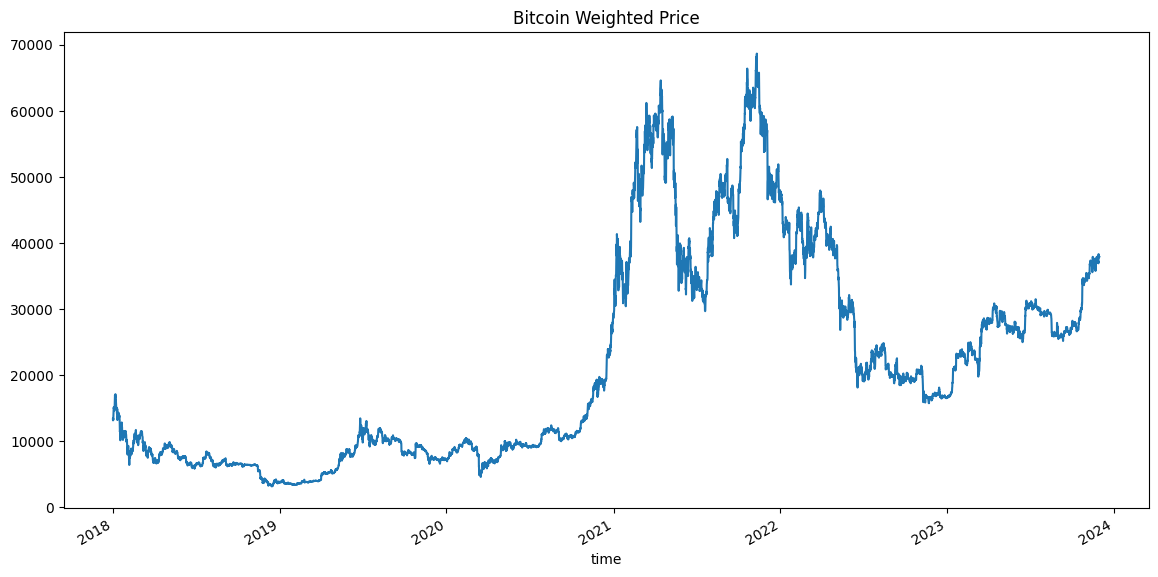

In [ ]:
# Real bitcoin trend from 2018-01-01 to 2023-11-30
btc_data.close.plot(figsize=(14,7), title="Bitcoin Weighted Price")

<Axes: xlabel='close', ylabel='Density'>

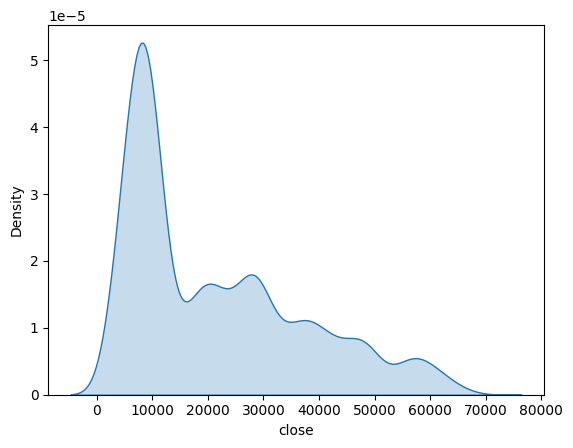

In [ ]:
sns.kdeplot(btc_data['close'], shade=True)

We can clearly see that the density is mostly towards zero as there is a downward trend in the long term for the BTC price.

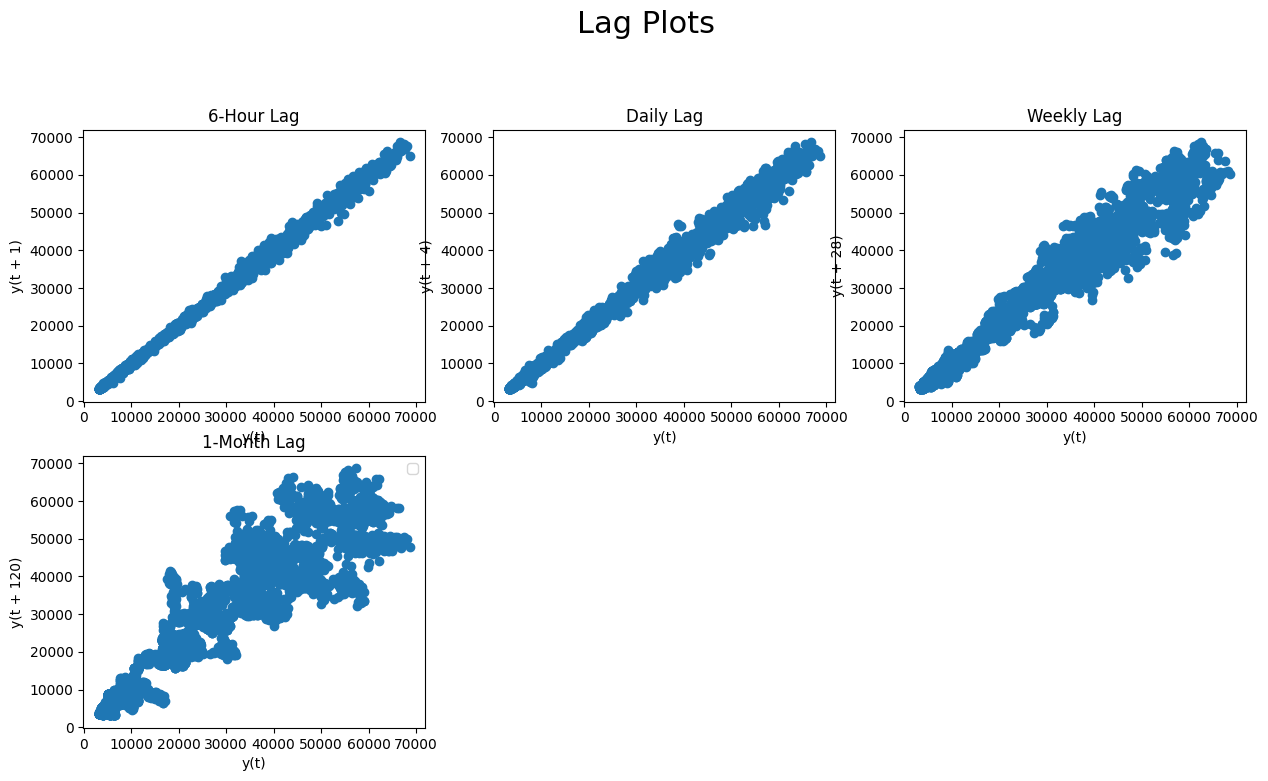

In [ ]:
plt.figure(figsize=(15,12))
plt.suptitle('Lag Plots', fontsize=22)


plt.subplot(3,3,1)
pd.plotting.lag_plot(btc_data['close'], lag=1) #6hour lag
plt.title('6-Hour Lag')

plt.subplot(3,3,2)
pd.plotting.lag_plot(btc_data['close'], lag=4) #Daily lag
plt.title('Daily Lag')

plt.subplot(3,3,3)
pd.plotting.lag_plot(btc_data['close'], lag=28) #weekly lag
plt.title('Weekly Lag')

plt.subplot(3,3,4)
pd.plotting.lag_plot(btc_data['close'], lag=120) #month lag
plt.title('1-Month Lag')

plt.legend()
plt.show()

There is a positive correlation for 6 hour,daily as well as weekly lag plots.But we can clearly see that there is no correlation for monthly lag plot. Also our data at 6-hour level preserving the auto correlation the most.
So, we will use 6 hour frequency data.

In [ ]:
btc_data.close

time
2018-01-01 06:00:00    13279.99
2018-01-01 12:00:00    13138.11
2018-01-01 18:00:00    13480.01
2018-01-02 00:00:00    13194.02
2018-01-02 06:00:00    13645.41
                         ...   
2022-01-30 00:00:00    38148.43
2022-01-30 06:00:00    38137.48
2022-01-30 12:00:00    38008.74
2022-01-30 18:00:00    37901.35
2022-01-31 00:00:00    37026.45
Name: close, Length: 5963, dtype: float64

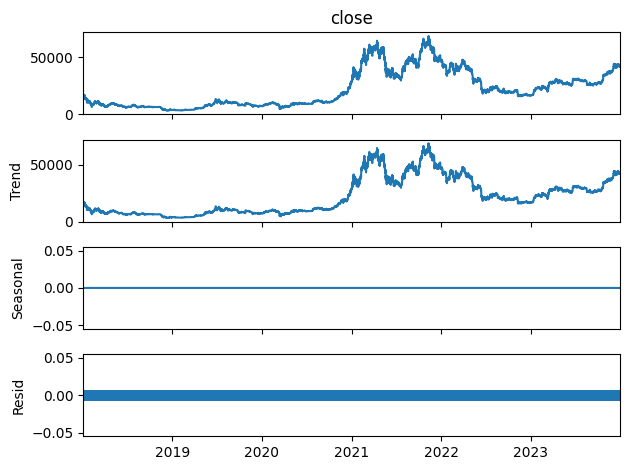

<Figure size 1500x1200 with 0 Axes>

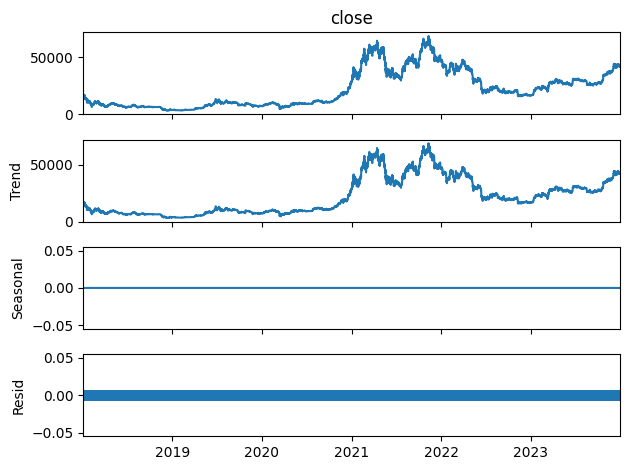

In [ ]:
plt.figure(figsize=(15,12))
series = btc_data.close
result = seasonal_decompose(series, model='additive',period=1)
result.plot()

Looking at the images, we see that there's no seasonality. There is no constant mean, covariance, or variance. Hence, this looks like nonstationary.

####Feature Engineering

In [10]:
# rolling mean or moving average is a transformation method which helps average out noise from data it works by simply
# splitting and aggregating the data in windows according to functions such as mean median count etc.
df=btc_data.reset_index(drop=False, inplace=False)

rolling_features = ["low", "high", "open", "close","volume"]
window1 = 12
window2 = 28
window3 = 120

# First convert our original df to a rolling df of 3d, 7d  and 30d
df_rolled_3d = df[rolling_features].rolling(window=window1, min_periods=0)
df_rolled_7d = df[rolling_features].rolling(window=window2, min_periods=0)
df_rolled_30d = df[rolling_features].rolling(window=window3, min_periods=0)


# dataframe.shift() function Shift index by desired number of periods. It takes a scalar parameter called the period,
# which represents the number of shifts to be made over the desired axis. It defaults to 1 and
# it is shifting values vertically along the axis 0 . NaN will be filled for missing values introduced as a result of the shifting.
# Very helpful when dealing with time-series data.
df_mean_3d = df_rolled_3d.mean().shift(1).reset_index()
df_mean_7d = df_rolled_7d.mean().shift(1).reset_index()
df_mean_30d = df_rolled_30d.mean().shift(1).reset_index()

df_std_3d = df_rolled_3d.std().shift(1).reset_index()
df_std_7d = df_rolled_7d.std().shift(1).reset_index()
df_std_30d = df_rolled_30d.std().shift(1).reset_index()

# Just print to see the structure of one of them
df_std_7d

,index,low,high,open,close,volume
0,0,NaN,NaN,NaN,NaN,NaN
1,1,NaN,NaN,NaN,NaN,NaN
2,2,166.523647,346.482323,161.227417,100.324310,691.172334
3,3,120.485955,256.001555,186.608818,171.771915,660.742471
4,4,106.195622,260.861116,174.786441,149.816720,2058.216994
...,...,...,...,...,...,...
8630,8630,513.686548,477.239721,542.686626,456.093981,2447.939721
8631,8631,431.730041,431.948009,455.853823,426.304344,2437.503367
8632,8632,419.453625,420.188187,426.105135,398.429025,2429.568755
8633,8633,372.318805,376.545753,398.270113,357.568958,2493.504706


In [11]:
for feature in rolling_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature]
    df[f"{feature}_mean_lag{window2}"] = df_mean_7d[feature]
    df[f"{feature}_mean_lag{window3}"] = df_mean_30d[feature]

    df[f"{feature}_std_lag{window1}"] = df_std_3d[feature]
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature]
    df[f"{feature}_std_lag{window3}"] = df_std_30d[feature]

df.fillna(df.mean(), inplace=True)

df.set_index("time", drop=False, inplace=True)
df.head()

,time,low,high,open,close,volume,low_mean_lag12,low_mean_lag28,low_mean_lag120,low_std_lag12,...,close_mean_lag120,close_std_lag12,close_std_lag28,close_std_lag120,volume_mean_lag12,volume_mean_lag28,volume_mean_lag120,volume_std_lag12,volume_std_lag28,volume_std_lag120
time,,,,,,,,,,,,,,,,,,,,,
2018-01-01 06:00:00,2018-01-01 06:00:00,13188.00,13889.00,13508.01,13279.99,2062.979166,21112.605243,21090.9035,20972.155442,483.226080,...,21266.054839,469.842665,719.317775,1561.667095,4074.412708,4076.230246,4086.154437,2316.136157,2612.807471,3019.350158
2018-01-01 12:00:00,2018-01-01 12:00:00,12952.50,13399.00,13280.00,13138.11,3040.444454,13188.000000,13188.0000,13188.000000,483.226080,...,13279.990000,469.842665,719.317775,1561.667095,2062.979166,2062.979166,2062.979166,2316.136157,2612.807471,3019.350158
2018-01-01 18:00:00,2018-01-01 18:00:00,13114.47,13772.59,13138.12,13480.01,3321.882600,13070.250000,13070.2500,13070.250000,166.523647,...,13209.050000,100.324310,100.324310,100.324310,2551.711810,2551.711810,2551.711810,691.172334,691.172334,691.172334
2018-01-02 00:00:00,2018-01-02 00:00:00,13005.00,13999.00,13480.00,13194.02,6780.942651,13084.990000,13084.9900,13084.990000,120.485955,...,13299.370000,171.771915,171.771915,171.771915,2808.435406,2808.435406,2808.435406,660.742471,660.742471,660.742471
2018-01-02 06:00:00,2018-01-02 06:00:00,13154.63,13750.00,13194.01,13645.41,2399.492945,13064.992500,13064.9925,13064.992500,106.195622,...,13273.032500,149.816720,149.816720,149.816720,3801.562218,3801.562218,3801.562218,2058.216994,2058.216994,2058.216994


In [12]:
df["month"] = df.time.dt.month
df["week"] = df.time.dt.week
df["day"] = df.time.dt.day
df["day_of_week"] = df.time.dt.dayofweek
df.head()

,time,low,high,open,close,volume,low_mean_lag12,low_mean_lag28,low_mean_lag120,low_std_lag12,...,volume_mean_lag12,volume_mean_lag28,volume_mean_lag120,volume_std_lag12,volume_std_lag28,volume_std_lag120,month,week,day,day_of_week
time,,,,,,,,,,,,,,,,,,,,,
2018-01-01 06:00:00,2018-01-01 06:00:00,13188.00,13889.00,13508.01,13279.99,2062.979166,21112.605243,21090.9035,20972.155442,483.226080,...,4074.412708,4076.230246,4086.154437,2316.136157,2612.807471,3019.350158,1,1,1,0
2018-01-01 12:00:00,2018-01-01 12:00:00,12952.50,13399.00,13280.00,13138.11,3040.444454,13188.000000,13188.0000,13188.000000,483.226080,...,2062.979166,2062.979166,2062.979166,2316.136157,2612.807471,3019.350158,1,1,1,0
2018-01-01 18:00:00,2018-01-01 18:00:00,13114.47,13772.59,13138.12,13480.01,3321.882600,13070.250000,13070.2500,13070.250000,166.523647,...,2551.711810,2551.711810,2551.711810,691.172334,691.172334,691.172334,1,1,1,0
2018-01-02 00:00:00,2018-01-02 00:00:00,13005.00,13999.00,13480.00,13194.02,6780.942651,13084.990000,13084.9900,13084.990000,120.485955,...,2808.435406,2808.435406,2808.435406,660.742471,660.742471,660.742471,1,1,2,1
2018-01-02 06:00:00,2018-01-02 06:00:00,13154.63,13750.00,13194.01,13645.41,2399.492945,13064.992500,13064.9925,13064.992500,106.195622,...,3801.562218,3801.562218,3801.562218,2058.216994,2058.216994,2058.216994,1,1,2,1


In [13]:
# From df.columns, I remove all the original 8 columns i.e
# 'time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Volume',
# So I will be left with below newly created (engineered) columns

exogenous_features = ['open_mean_lag12',
       'open_mean_lag28', 'open_mean_lag120', 'open_std_lag12', 'open_std_lag28',
       'open_std_lag120', 'high_mean_lag12', 'high_mean_lag28', 'high_mean_lag120',
       'high_std_lag12', 'high_std_lag28', 'high_std_lag120', 'low_mean_lag12',
       'low_mean_lag28', 'low_mean_lag120', 'low_std_lag12', 'low_std_lag28',
       'low_std_lag120', 'close_mean_lag12', 'close_mean_lag28',
       'close_mean_lag120', 'close_std_lag12', 'close_std_lag28',
       'close_std_lag120', 'volume_mean_lag12', 'volume_mean_lag28',
       'volume_mean_lag120', 'volume_std_lag12',
       'volume_std_lag28', 'volume_std_lag120', 'month', 'week',
       'day', 'day_of_week']


In [14]:
btc_2018to2022 = df[(df['time'] >= "2018-01-01") & (df['time'] <= "2022-01-31")]

In [15]:
btc_2018to2022.tail()

,time,low,high,open,close,volume,low_mean_lag12,low_mean_lag28,low_mean_lag120,low_std_lag12,...,volume_mean_lag12,volume_mean_lag28,volume_mean_lag120,volume_std_lag12,volume_std_lag28,volume_std_lag120,month,week,day,day_of_week
time,,,,,,,,,,,,,,,,,,,,,
2022-01-30 00:00:00,2022-01-30 00:00:00,37767.54,38320.00,38189.82,38148.43,2526.223102,36577.113333,35935.673214,41005.432500,771.000084,...,4951.734817,5879.958882,4723.476605,1953.865314,3270.837566,3402.778951,1,4,30,6
2022-01-30 06:00:00,2022-01-30 06:00:00,37837.33,38384.07,38148.43,38137.48,1933.168737,36763.569167,36041.299643,40930.057333,765.297268,...,4613.357578,5818.322189,4718.895662,1996.117344,3318.563389,3405.384592,1,4,30,6
2022-01-30 12:00:00,2022-01-30 12:00:00,37744.94,38169.18,38137.48,38008.74,2166.718424,36929.308333,36137.258571,40855.229333,764.459576,...,4519.011668,5773.280105,4705.356219,2099.989306,3363.748272,3413.260143,1,4,30,6
2022-01-30 18:00:00,2022-01-30 18:00:00,37365.31,38261.68,38009.58,37901.35,4006.425649,37060.975833,36233.346071,40779.191250,756.867209,...,4254.569178,5704.474133,4684.265671,2185.272256,3418.641773,3421.118638,1,4,30,6
2022-01-31 00:00:00,2022-01-31 00:00:00,36640.94,37960.18,37904.99,37026.45,4124.826937,37214.221667,36331.214286,40710.152167,584.425887,...,3870.990969,5636.827043,4653.662393,1701.905674,3433.326893,3410.515137,1,5,31,0


In [21]:
btc_2018to2022_train = btc_2018to2022[btc_2018to2022.time < "2021-08-01"]
btc_2018to2022_valid = btc_2018to2022[btc_2018to2022.time >= "2021-08-01"]

print('train shape :', btc_2018to2022_train.shape)
print('validation shape :', btc_2018to2022_valid.shape)

train shape : (5230, 40)
validation shape : (733, 40)


FB Prophet

In [16]:
from prophet import Prophet

In [17]:
# Renaming the column names according to Prophet's requirements

daily_data_fb = btc_data.reset_index()[['time','close']].rename({'time':'ds','close':'y'}, axis=1)
daily_data_fb.tail()

,ds,y
8630,2023-11-29 00:00:00,38059.61
8631,2023-11-29 06:00:00,38126.32
8632,2023-11-29 12:00:00,37782.20
8633,2023-11-29 18:00:00,37863.84
8634,2023-11-30 00:00:00,37891.01


In [18]:
split_date = "2021-08-01"
train_split = daily_data_fb['ds'] <= split_date
test_split = daily_data_fb['ds'] > split_date

train_fb = daily_data_fb[train_split]
test_fb = daily_data_fb[test_split]

In [19]:
print("train data shape :", train_fb.shape)
print("test data shape :", test_fb.shape)

train data shape : (5231, 2)
test data shape : (3404, 2)


In [22]:
model_fbprophet = Prophet()
for feature in exogenous_features:
    model_fbprophet.add_regressor(feature)

model_fbprophet.fit(btc_2018to2022_train[["time", "close"] + exogenous_features].rename(columns={"time": "ds", "close": "y"}))

forecast = model_fbprophet.predict(btc_2018to2022_valid[["time", "close"] + exogenous_features].rename(columns={"time": "ds"}))

forecast.head()

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvk3j3cya/tz22trnq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvk3j3cya/8rg1eyk3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90602', 'data', 'file=/tmp/tmpvk3j3cya/tz22trnq.json', 'init=/tmp/tmpvk3j3cya/8rg1eyk3.json', 'output', 'file=/tmp/tmpvk3j3cya/prophet_model9js2zj2s/prophet_model-20240112205101.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:51:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:51:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,close_mean_lag12,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-08-01 00:00:00,14632.068699,40660.035064,42048.985450,14632.068699,14632.068699,26707.587442,26707.587442,26707.587442,141123.966371,...,6.312156,6.312156,6.312156,-219.421447,-219.421447,-219.421447,0.0,0.0,0.0,41339.656141
1,2021-08-01 06:00:00,14632.231049,41053.748477,42466.060595,14632.231049,14632.231049,27084.536554,27084.536554,27084.536554,141902.542599,...,-9.237490,-9.237490,-9.237490,-220.463480,-220.463480,-220.463480,0.0,0.0,0.0,41716.767602
2,2021-08-01 12:00:00,14632.393398,41112.346915,42546.549390,14632.393398,14632.393398,27177.839679,27177.839679,27177.839679,142723.366834,...,-19.347550,-19.347550,-19.347550,-221.524436,-221.524436,-221.524436,0.0,0.0,0.0,41810.233077
3,2021-08-01 18:00:00,14632.555748,40991.791028,42357.948245,14632.555748,14632.555748,27046.087844,27046.087844,27046.087844,143385.920097,...,-21.674601,-21.674601,-21.674601,-222.603039,-222.603039,-222.603039,0.0,0.0,0.0,41678.643592
4,2021-08-02 00:00:00,14632.718098,39954.285580,41362.109407,14632.718098,14632.718098,26021.173504,26021.173504,26021.173504,143307.393762,...,-16.608713,-16.608713,-16.608713,-223.698026,-223.698026,-223.698026,0.0,0.0,0.0,40653.891602


In [23]:
btc_2018to2022_valid["Forecast_Prophet"] = forecast.yhat.values

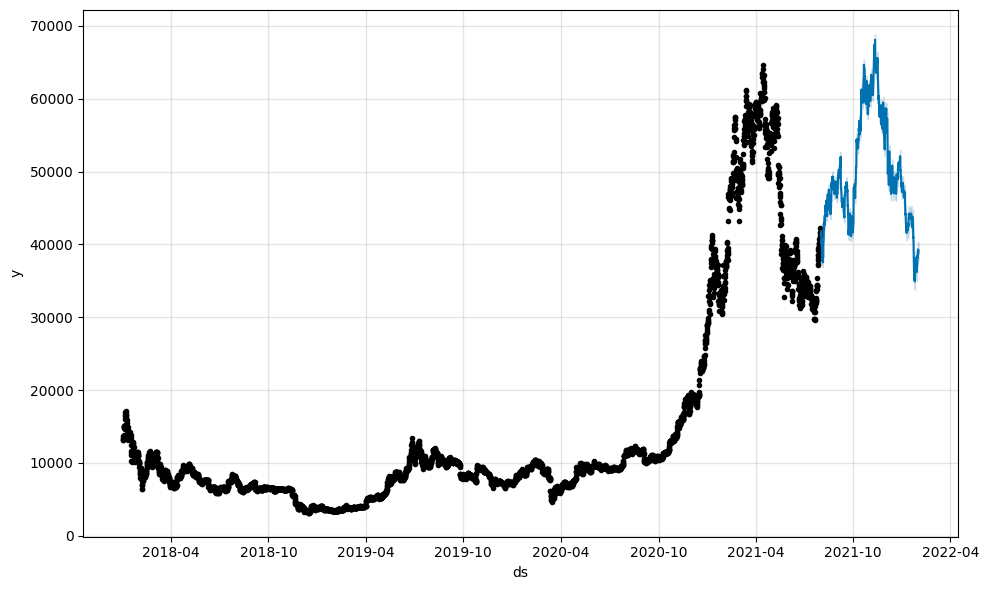

In [24]:
# Plot Our Predictions
fig1 = model_fbprophet.plot(forecast)

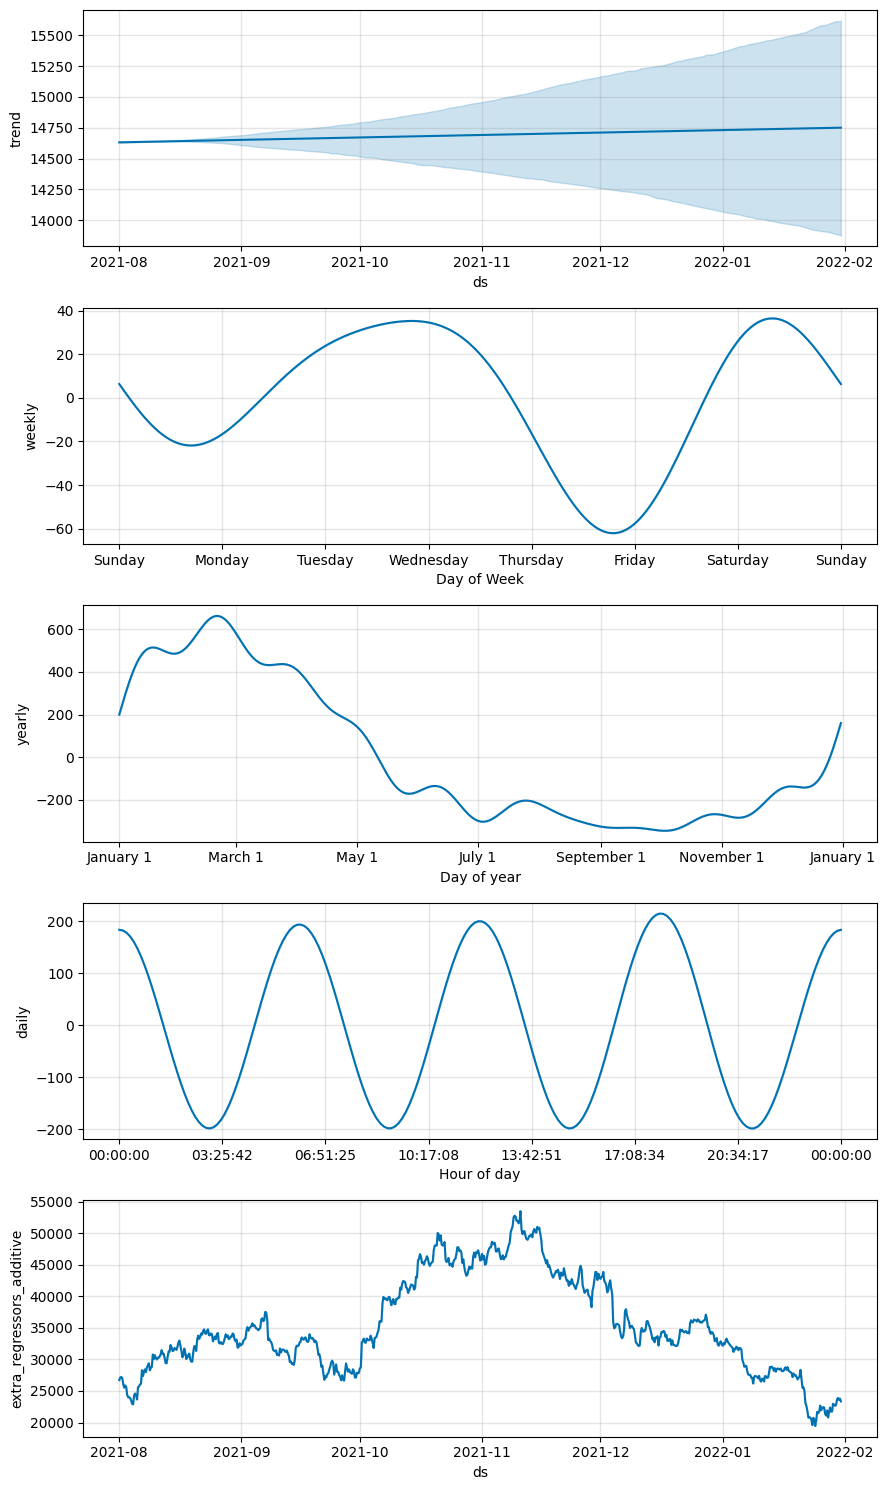

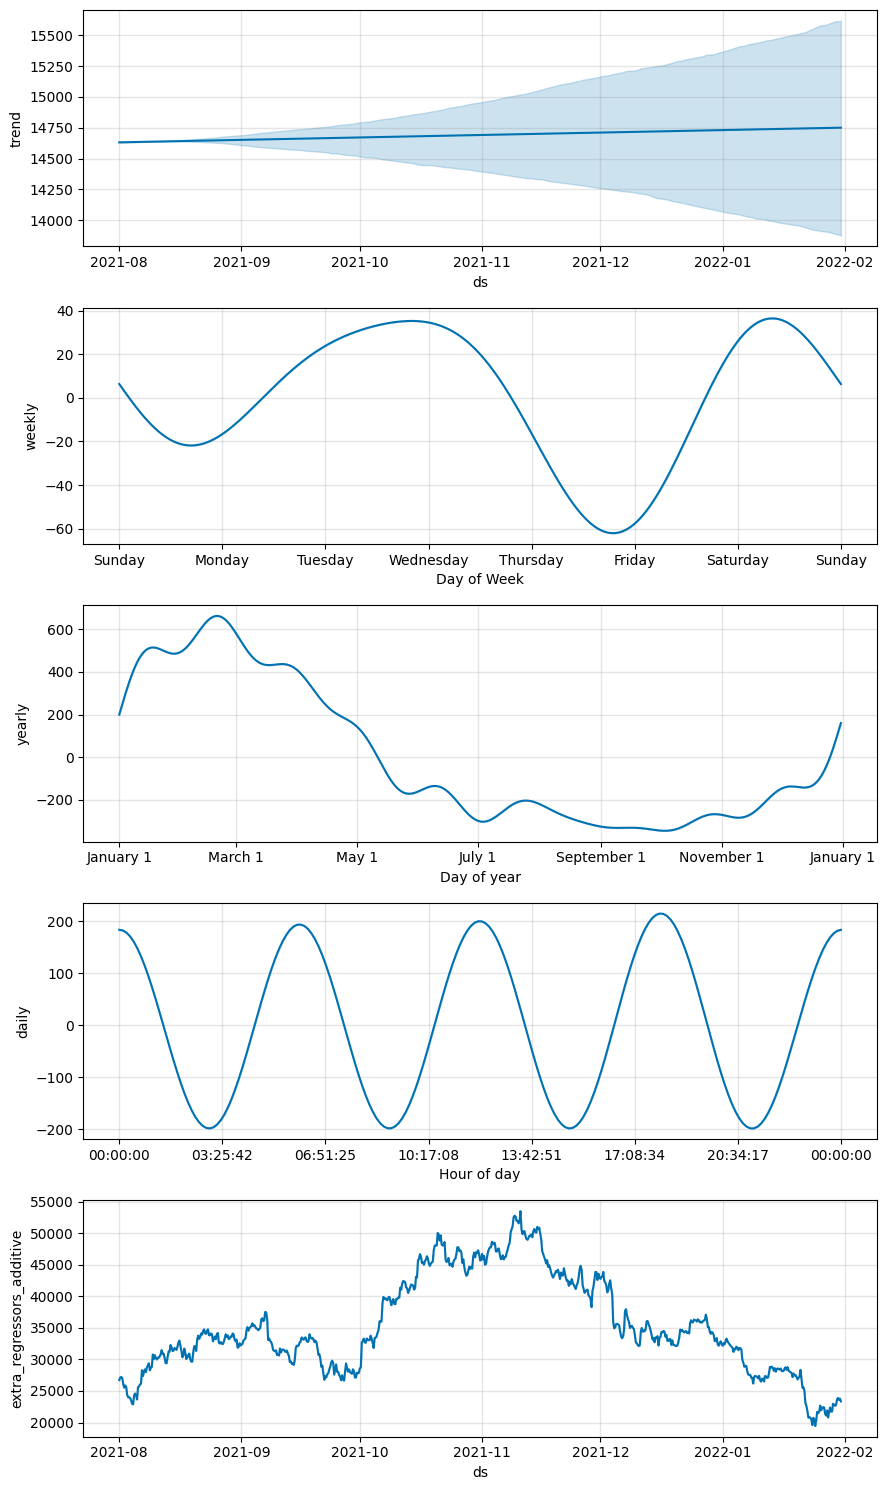

In [25]:
model_fbprophet.plot_components(forecast)

<Axes: xlabel='time'>

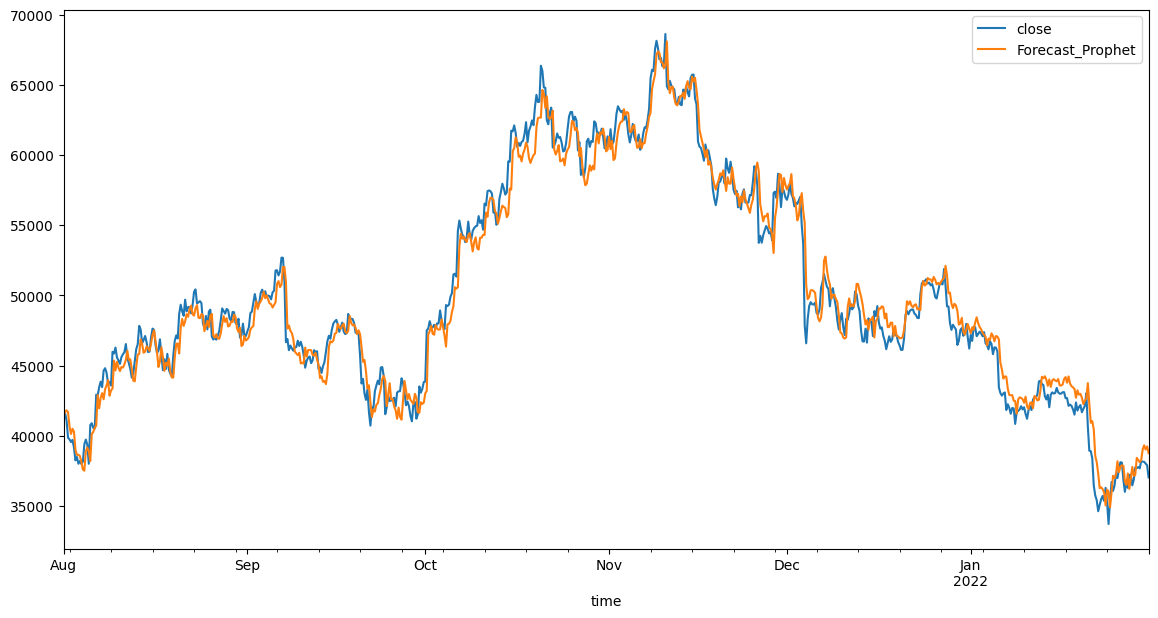

In [ ]:
btc_2018to2022_valid[["close", "Forecast_Prophet"]].plot(figsize=(14, 7))

We can see that the fbprophet model does a preety well job predicting the closing price of the bitcoin where the blue line is the original value and the orange line is the forecasted value.

In [ ]:
test_mae_prophet = mean_absolute_error(btc_2018to2022_valid['close'], btc_2018to2022_valid['Forecast_Prophet'])

test_rmse_prophet = np.sqrt(mean_squared_error(btc_2018to2022_valid['close'], btc_2018to2022_valid['Forecast_Prophet']))

print(f"Prophet's Test MAE : {test_mae_prophet}")
print(f"Prophet's Test RMSE : {test_rmse_prophet}")

Prophet's Test MAE : 954.5041587062896
Prophet's Test RMSE : 1253.9416879049927


The MAE and RMSE scores are quite good.

### Testing Out-Of-Sample data

In [26]:
btc_outofsample_test = df[(df['time'] >= "2022-06-01") & (df['time'] <= "2022-12-31")]

In [27]:
btc_outofsample_test.tail()

,time,low,high,open,close,volume,low_mean_lag12,low_mean_lag28,low_mean_lag120,low_std_lag12,...,volume_mean_lag12,volume_mean_lag28,volume_mean_lag120,volume_std_lag12,volume_std_lag28,volume_std_lag120,month,week,day,day_of_week
time,,,,,,,,,,,,,,,,,,,,,
2022-12-30 00:00:00,2022-12-30 00:00:00,16508.00,16638.76,16627.36,16547.68,3621.179145,16592.425000,16701.403214,16883.314000,115.422617,...,5076.342444,3854.867596,5863.702694,1743.957079,2167.161223,4055.660869,12,52,30,4
2022-12-30 06:00:00,2022-12-30 06:00:00,16422.74,16569.33,16546.68,16488.30,5427.661345,16565.038333,16693.847143,16884.019250,87.921683,...,5107.428279,3824.251090,5782.127849,1711.428501,2164.078706,4000.671347,12,52,30,4
2022-12-30 12:00:00,2022-12-30 12:00:00,16326.16,16569.94,16488.11,16525.19,10141.932886,16533.330833,16680.176071,16880.668583,57.589143,...,5335.043910,3928.210285,5790.397967,1534.039212,2168.856033,3998.889055,12,52,30,4
2022-12-30 18:00:00,2022-12-30 18:00:00,16507.94,16649.99,16525.18,16600.10,7341.506659,16509.381667,16665.215714,16877.383583,77.508646,...,5705.587626,3978.162648,5789.894938,2071.774091,2296.228781,3998.333168,12,52,30,4
2022-12-31 00:00:00,2022-12-31 00:00:00,16523.16,16607.96,16599.98,16531.53,2634.888563,16502.879167,16656.570714,16875.740667,73.677681,...,5830.524681,4018.203062,5730.491596,2125.280018,2346.010597,3920.485878,12,52,31,5


In [28]:
forecast_test = model_fbprophet.predict(btc_outofsample_test[["time", "close"] + exogenous_features].rename(columns={"time": "ds"}))

In [36]:
forecast_test.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,close_mean_lag12,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-06-01 00:00:00,14829.485887,31263.218875,32670.434559,14829.485887,14829.485887,17122.881646,17122.881646,17122.881646,88043.489267,...,34.536059,34.536059,34.536059,-160.550517,-160.550517,-160.550517,0.0,0.0,0.0,31952.367533
1,2022-06-01 06:00:00,14829.648237,31110.394567,32459.457049,14829.648237,14829.648237,16995.273076,16995.273076,16995.273076,89210.744457,...,30.017894,30.017894,30.017894,-159.548880,-159.548880,-159.548880,0.0,0.0,0.0,31824.921313
2,2022-06-01 12:00:00,14829.810587,31205.724907,32545.938374,14829.810587,14829.810587,17074.555131,17074.555131,17074.555131,90291.067029,...,19.991958,19.991958,19.991958,-158.525387,-158.525387,-158.525387,0.0,0.0,0.0,31904.365717
3,2022-06-01 18:00:00,14829.972936,30211.703169,31585.297758,14829.972936,14829.972936,16058.167908,16058.167908,16058.167908,90720.058253,...,4.012060,4.012060,4.012060,-157.483589,-157.483589,-157.483589,0.0,0.0,0.0,30888.140844
4,2022-06-02 00:00:00,14830.135286,29868.952770,31150.471850,14830.135286,14830.135286,15718.353341,15718.353341,15718.353341,90874.250169,...,-16.372464,-16.372464,-16.372464,-156.427046,-156.427046,-156.427046,0.0,0.0,0.0,30548.488627


In [33]:
btc_outofsample_test["Forecast_Prophet"] = forecast_test.yhat.values

In [34]:
btc_outofsample_test.head()

,time,low,high,open,close,volume,low_mean_lag12,low_mean_lag28,low_mean_lag120,low_std_lag12,...,volume_mean_lag28,volume_mean_lag120,volume_std_lag12,volume_std_lag28,volume_std_lag120,month,week,day,day_of_week,Forecast_Prophet
time,,,,,,,,,,,,,,,,,,,,,
2022-06-01 00:00:00,2022-06-01 00:00:00,31315.23,31964.56,31784.18,31607.20,3690.625292,30158.778333,29410.701786,31134.090083,1078.796823,...,4477.253938,6512.535163,2431.133858,2499.938199,4831.071913,6,22,1,2,31952.367533
2022-06-01 06:00:00,2022-06-01 06:00:00,31425.00,31689.74,31607.19,31589.01,2577.707677,30367.560833,29474.916071,31075.336167,1035.571545,...,4463.117251,6518.508652,2242.782457,2503.346798,4827.101133,6,22,1,2,31824.921313
2022-06-01 12:00:00,2022-06-01 12:00:00,29852.50,31888.00,31589.01,30152.34,12631.014183,30576.030000,29550.344643,31016.599750,968.009691,...,4455.146754,6516.951867,2071.727323,2509.183749,4828.351965,6,22,1,2,31904.365717
2022-06-01 18:00:00,2022-06-01 18:00:00,29308.01,30408.49,30152.34,29788.79,7958.115483,30636.306667,29570.215357,30947.237333,889.023560,...,4722.058928,6563.967449,2901.701046,2946.113886,4860.351059,6,22,1,2,30888.140844
2022-06-02 00:00:00,2022-06-02 00:00:00,29558.61,29884.30,29789.19,29851.86,4685.751491,30657.906667,29563.358571,30874.462417,849.203876,...,4822.857388,6586.789156,2777.283638,3008.415821,4860.414672,6,22,2,3,30548.488627


<Axes: xlabel='time'>

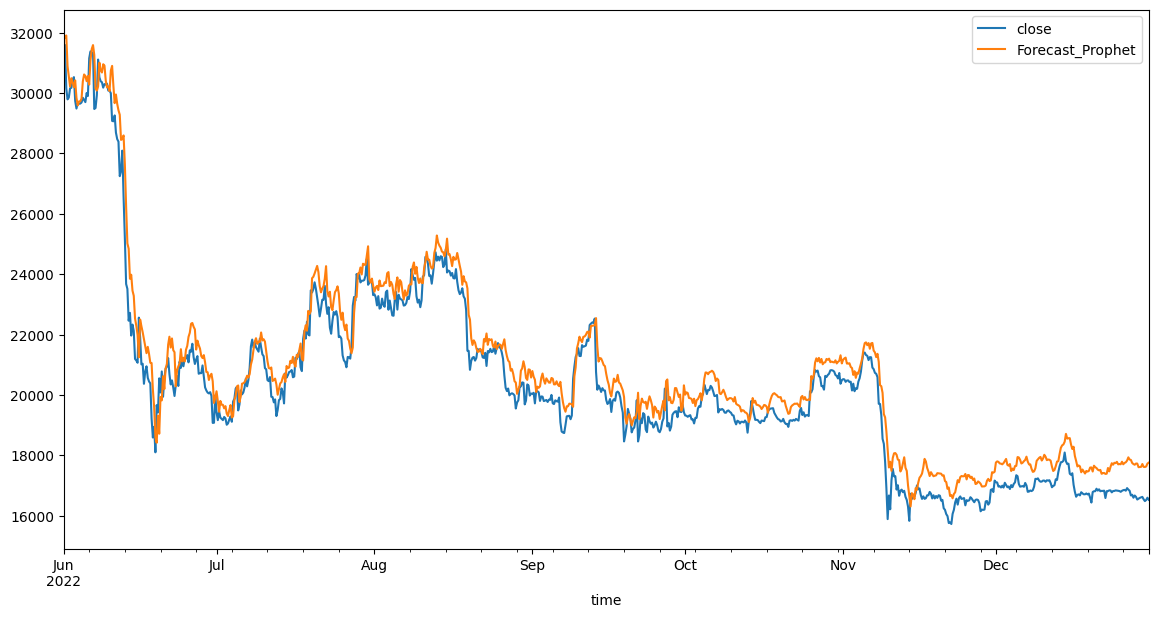

In [31]:
btc_outofsample_test[["close", "Forecast_Prophet"]].plot(figsize=(14, 7))

### Risk Analysis

In [111]:
btc_outofsample_test = df[(df['time'] >= "2020-09-01") & (df['time'] <= "2021-03-30")]

In [113]:
forecast = model_fbprophet.predict(btc_outofsample_test[["time", "close"] + exogenous_features].rename(columns={"time": "ds"}))

In [114]:
forecast=forecast.rename(columns={"ds": "Date","yhat": "Bitcoin"})

In [115]:
forecast=forecast[['Date', 'Bitcoin']]

In [116]:
forecast = forecast.set_index('Date')

In [117]:
forecast.tail()

,Bitcoin
Date,
2021-03-29 00:00:00,56124.310258
2021-03-29 06:00:00,55069.007065
2021-03-29 12:00:00,57308.394783
2021-03-29 18:00:00,57181.628820
2021-03-30 00:00:00,57361.358252


In [93]:
!pip install pyfolio-reloaded==0.9.5

Start date,2020-09-01
End date,2021-03-30
Total months,40
,Backtest
Annual return,61.665%
Cumulative returns,395.895%
Annual volatility,27.363%
Sharpe ratio,1.89
Calmar ratio,2.28
Stability,0.97
Max drawdown,-27.043%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,27.04,2021-01-08,2021-01-28,2021-02-08,22
1,24.84,2021-02-22,2021-02-28,2021-03-12,15
2,16.98,2020-09-01,2020-09-09,2020-10-20,36
3,14.48,2021-03-14,2021-03-25,NaT,NaN
4,12.88,2020-11-25,2020-11-27,2020-11-30,4


Stress Events,mean,min,max
Covid,0.21%,-6.34%,11.69%


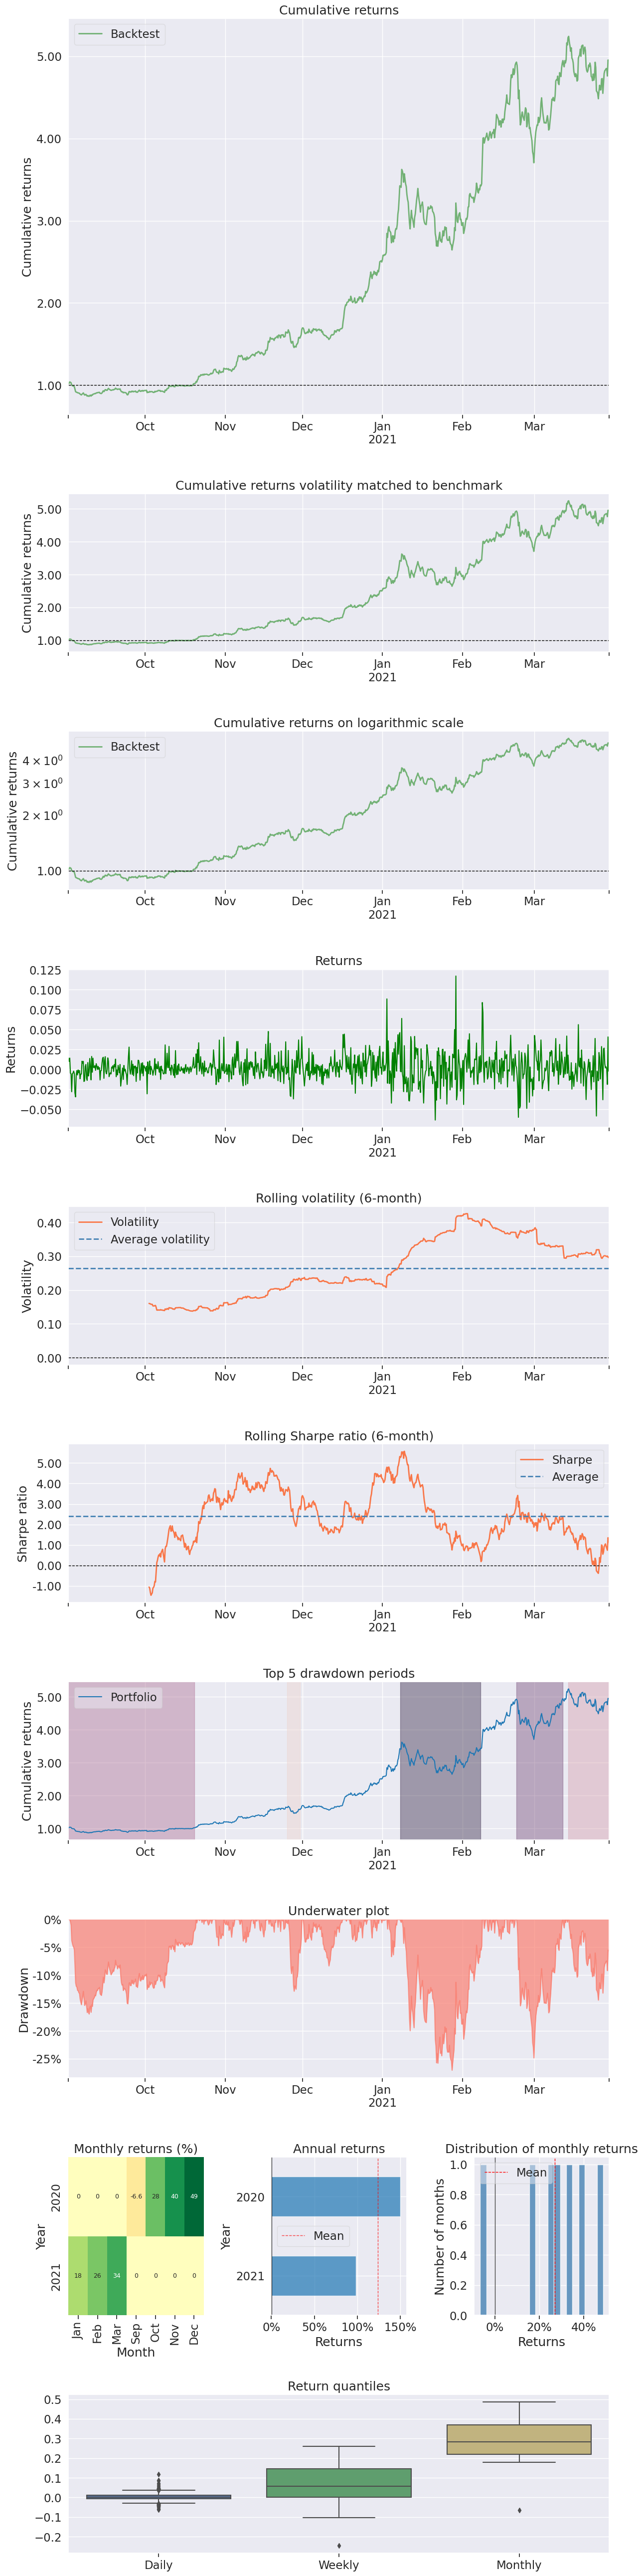

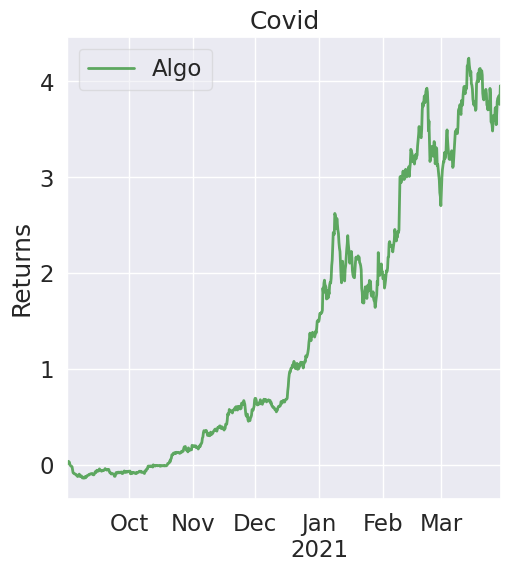

In [118]:

forecast = forecast.pct_change().dropna().mean(axis=1)

# Import Pyfolio
import pyfolio as pf

# Get the full tear sheet
pf.create_full_tear_sheet(forecast)